# RECURRENT NEURAL NETWORK FOR LOANWORDS DETECTION #

This notebook contains implementation of the **GRU-based Recurrent Neural Network** for the loanwords detection in Indonesian. The loanwords are detected on the basis of the words' phonemes. 

### Outline 

0. Modules and Data 

1. Building and Training the Model

2. Testing the Model 

3. Hyperparameters Tuning 

4. Exemplar predictions 

## 0. Modules and data ##

In [215]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [151]:
df = pd.read_csv('indonesian_wordforms.csv') 

In [152]:
df [1000:1051]

,value,segments,language,borrowing_score
1000,mendekati,"['m', 'e', 'n', 'd', 'e', 'k', 'a', 't', 'i']",Indonesian,0.00
1001,menghampiri,"['m', 'e', 'ŋ', 'h', 'a', 'm', 'p', 'i', 'r', ...",Indonesian,0.00
1002,masuk,"['m', 'a', 's', 'u', 'ʔ']",Indonesian,0.50
1003,membawa,"['m', 'e', 'm', 'b', 'a', 'w', 'a']",Indonesian,0.25
1004,menggéndong,"['m', 'e', 'ŋ', 'g', 'é/e', 'n', 'd', 'o', 'ŋ']",Indonesian,1.00
1005,menggenggam,"['m', 'e', 'ŋ', 'g', 'e', 'ŋ', 'g', 'a', 'm']",Indonesian,0.00
1006,menénténg,"['m', 'e', 'n', 'é/e', 'n', 't', 'é/e', 'ŋ']",Indonesian,1.00
1007,menjinjing,"['m', 'e', 'ɲ', 'i', 'ɲ', 'i', 'ŋ']",Indonesian,0.00
1008,memikul,"['m', 'e', 'm', 'i', 'k', 'u', 'l']",Indonesian,0.00
1009,menjunjung,"['m', 'e', 'ɲ', 'u', 'ɲ', 'u', 'ŋ']",Indonesian,0.00


### 0.1. Making a list-like representation of segments ###

In [153]:
new_dfseg = []

for i in df.segments:
    new_dfseg.append(eval(i))

df.segments = new_dfseg

### 0.2. Dealing with atypical phonemes cases ###

For the detailed explanation of this step, refer to `phonemes.ipynb`.

In [154]:
segments_prep = []

for word in df.segments:
    phonemes = []
    for i in word:
        if 'A/a' == i or 'K/k' == i or 'M/m' == i or 'R/r' == i or 'S/s' == i or 'ss/s' == i:
            i = i.replace(i,i[-1])
            phonemes.append(i)
        if 'J/dʒ' in i:
            i = i.replace(i, 'dʒ')
            phonemes.append(i)
        else:
            phonemes.append(i)
            
    segments_prep.append(phonemes)

In [155]:
df.segments = segments_prep

### 0.3. Classes to binary ###

Following the research of Miller et al. (2020), we define only 1-scored words as loanwords. These words are proved to be loanwords with 100% certainty. The other words are taken for non-loanwords class. 

In [117]:
classes = []

for s in df.borrowing_score:
    if s == 1.0:
        classes.append(s)
    else:
        classes.append(0.0)

In [167]:
df.borrowing_score = classes

### 0.4. Illustrating the distribution between the two classes

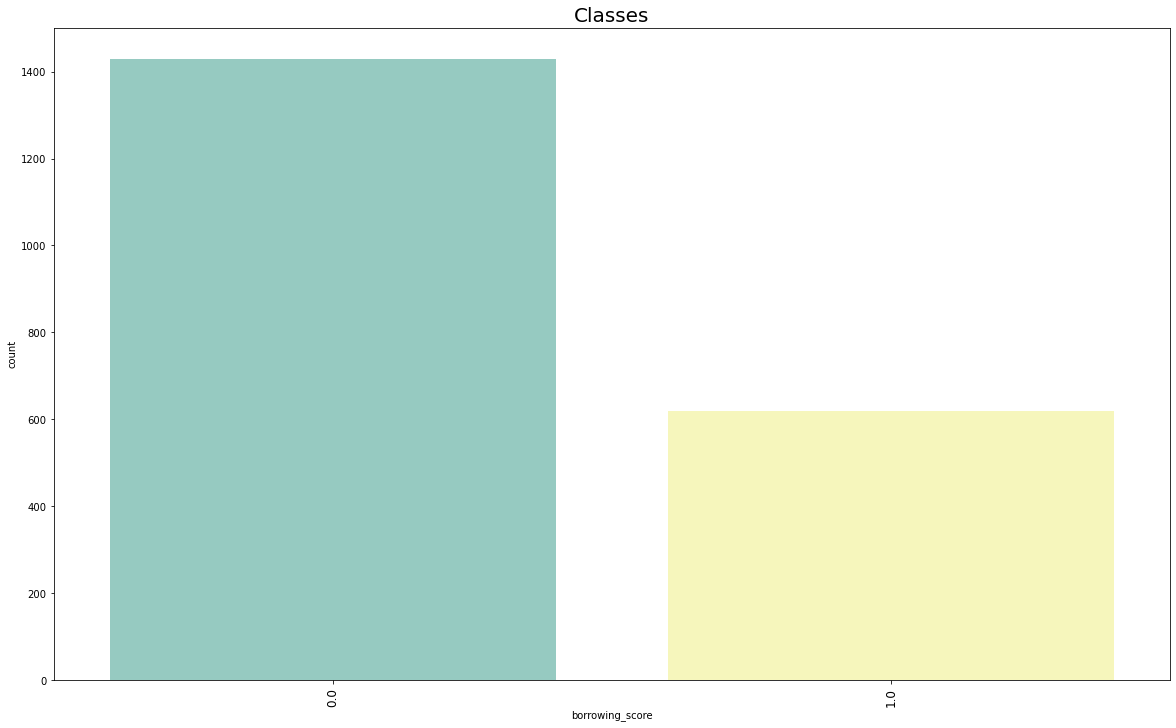

In [216]:
plt.figure(figsize=(20,12))
sns.countplot(df.borrowing_score.sort_values(), palette="Set3")
plt.title("Classes",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

### 0.5. Inducing the number of phonemes ####

In [211]:
all_letters = []

for l in df.segments:
    for s in l:
        if s not in all_letters:
            all_letters.append(s)

In [212]:
n_letters = len(all_letters)
n_letters

38

## 1. Building & testing the model ##

### Train-test splitting ###

In [168]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

## GRU-based Neural Network ##

The GRU-based RNN works as follows. 

It **takes**:

The **number of phonemes**=characters; **hidden layer size**, the **number of classes**, the **number of recurrent layers** and **batch size**. 

It **returns**:

**Hidden state** and two values corresponding to classes probabilities. 

It receives a word represented as a sequence of phonemes -> the sequence is embedded -> is passed to the recurrent layer. Then, its hidden state is formed and passed into the the network along with the next phoneme. Having the last phoneme, the network returns the output from the last layer -> two numbers represening the model's prediction for each class. The larger one is transformed into the class predicted for a word. 

In [213]:
class GRU(nn.Module):
    def __init__(self, n_characters_in, hidden_size, n_characters_out, n_layers=1, batch_size=1):

        super(GRU, self).__init__()
        self.n_characters_in = n_characters_in
        self.n_characters_out = n_characters_out
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.batch_size = batch_size
        
        self.encoder = nn.Embedding(num_embeddings=self.n_characters_in, 
                                    embedding_dim=self.hidden_size)
        self.gru = nn.GRU(input_size=self.hidden_size,
                            hidden_size=self.hidden_size,
                            num_layers=self.n_layers,
                            dropout=0.2)
        self.decoder = nn.Linear(self.hidden_size, n_characters_out)
    
    def forward(self, input_char, hidden):

        encoded = self.encoder(input_char)
        encoded.unsqueeze_(0)
        encoded.unsqueeze_(0)
        output, hidden = self.gru(encoded, hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def initHidden(self):

        return Variable(torch.zeros(self.n_layers, self.batch_size, self.hidden_size))

In [170]:
n_hidden = 32
n_classes = 2
rnn = GRU(n_letters, n_hidden, n_classes)

/Users/mariap/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Turning a sequence of phonemes into a decoded list.

In [171]:
def char_tensor(list_of_strings):
    tensor = torch.zeros(len(list_of_strings)).long()
    for c in range(len(list_of_strings)):
        tensor[c] = all_letters.index(list_of_strings[c])
    return Variable(tensor)

print(char_tensor(['a', 'l', 'u', 'n']))

tensor([4, 5, 1, 2])


In [172]:
hidden = rnn.initHidden()

The example of the output. 

In [174]:
input = char_tensor(['d', 'u', 'n', 'i', 'a'])
output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[ 0.3978, -0.0137]], grad_fn=<AddmmBackward>)


Train-test distribution. 

In [175]:
train_set.borrowing_score.value_counts()

0.0    1149
1.0     490
Name: borrowing_score, dtype: int64

In [176]:
test_set.borrowing_score.value_counts()

0.0    281
1.0    129
Name: borrowing_score, dtype: int64

Transforming the output matrix into a class. 

In [181]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return category_i

print(categoryFromOutput(output))

0


In [183]:
all_categories = [0, 1]

The function to take a random word from the data. 

In [184]:
def randomChoice(l):
    return l[random.randint(0, len(data)-1)]

def randomTrainingExample(data):
    random_num = random.randint(0, len(data)-1)
    category = int(data.borrowing_score[random_num])
    line = data.segments[random_num]
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = char_tensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample(train_set)
    print('category =', category, '/ line =', line)

category = 0 / line = ['m', 'e', 'n', 'a', 'n', 't', 'u']
category = 1 / line = ['m', 'e', 'ŋ', 'g', 'u', 'j', 'u', 'r']
category = 0 / line = ['h', 'a', 'l', 'a', 'm', 'a', 'n']
category = 1 / line = ['t', 'a', 'm', 'é/e', 'ŋ']
category = 0 / line = ['t', 'u', 'l', 'a', 'ŋ', '+', 'b', 'e', 'l', 'u', 'l', 'a', 'ŋ']
category = 1 / line = ['dʒ', 'a', 's', 'a', 'd']
category = 0 / line = ['m', 'e', 'n', 'e', 'l', 'a', 'n']
category = 0 / line = ['p', 'e', 'l', 'i', 'r']
category = 0 / line = ['h', 'a', 'n', 't', 'u']
category = 0 / line = ['b', 'u', 'r', 'u', 'ŋ', '+', 'n', 'u', 'r', 'i']


In [185]:
criterion = nn.CrossEntropyLoss()

In [219]:
learning_rate = 0.001 

def train(decoder, category_tensor, line_tensor, optimizer):
    hidden = decoder.initHidden()

    decoder.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = decoder(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()
    optimizer.step()

    return output, loss.item()

The **training loop** itself. 

In [187]:
n_iters = 40000 
print_every = 50
plot_every = 100

# Keeping track of losses for plotting 
current_loss = 0 
all_losses = []
rnn = GRU(n_letters, n_hidden, n_classes)
my_optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)


def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample(train_set)
    output, loss = train(rnn, category_tensor, line_tensor, my_optimizer)
    current_loss += loss

    # Printing iteration number, loss, name and guess
    if iter % print_every == 0:
        guess = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

50 0% (0m 0s) 0.5307 ['t', 'a', 'n', 'a', 'h'] / 0 ✓
100 0% (0m 0s) 0.7186 ['m', 'e', 'ŋ', 'a', 'w', 'i', 'n', 'i'] / 1 ✗ (0)
150 0% (0m 0s) 0.2386 ['m', 'e', 'ŋ', 'h', 'a', 'r', 'd', 'i', 'ʔ'] / 0 ✓
200 0% (0m 1s) 1.2765 ['k', 'a', 'b', 'u', 'r'] / 0 ✗ (1)
250 0% (0m 1s) 0.2522 ['s', 'i', 'a', 'ŋ'] / 0 ✓
300 0% (0m 1s) 0.7946 ['d', 'o', 'k', 't', 'e', 'r'] / 0 ✗ (1)
350 0% (0m 1s) 0.4577 ['b', 'e', 'b', 'e', 'r', 'a', 'p', 'a'] / 0 ✓
400 1% (0m 2s) 0.6027 ['a', 'l', 'a', 't'] / 1 ✓
450 1% (0m 2s) 0.7719 ['d', 'a', 'r', 'a', 't'] / 1 ✗ (0)
500 1% (0m 2s) 1.2418 ['p', 'a', 'p', 'a'] / 0 ✗ (1)
550 1% (0m 2s) 0.6823 ['s', 'e', 'p', 'a', 't', 'u', '+', 'b', 'o', 't'] / 1 ✓
600 1% (0m 3s) 0.5800 ['m', 'a', 'k', 'a', 'm'] / 1 ✓
650 1% (0m 3s) 0.3663 ['g', 'e', 't', 'a', 'h'] / 0 ✓
700 1% (0m 3s) 0.1313 ['t', 'e', 'ŋ', 'a', 'h'] / 0 ✓
750 1% (0m 3s) 0.4433 ['t', 'u', 'l', 'a', 'ŋ', '+', 'b', 'e', 'l', 'i', 'k', 'a', 't'] / 0 ✓
800 2% (0m 4s) 0.4919 ['p', 'é/e', 'n', 'd', 'é/e', 'ʔ'] / 0 ✓
850

From the loss graph we notice that 1) the losses tend to go down; 2) do not steadily keep going down in the end; 3) fluctuations are not prominent. Thus, we can conclude that the model is trained. 

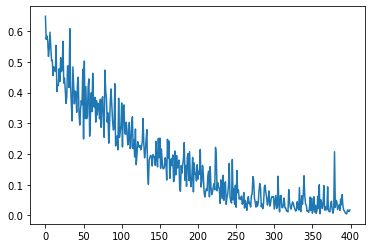

In [188]:
plt.figure()
plt.plot(all_losses)

## 2. Testing the model ##

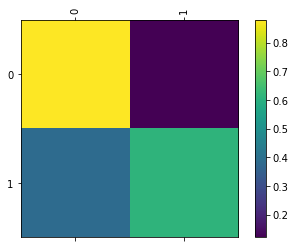

In [189]:
confusion = torch.zeros(2, 2)
n_confusion = 20000

# Returning an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Going through a bunch of examples and recording the guessed ones 
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample(test_set)
    output = evaluate(line_tensor)
    guess = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess] += 1

# Normalizing by dividing every row by its sum
for i in range(2):
    confusion[i] = confusion[i] / confusion[i].sum()

# Defining the plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [190]:
confusion

tensor([[0.8791, 0.1209],
        [0.3850, 0.6150]])

### Test-set evaluation ###

This is a function to extract a testing sample from the test set, in order to fully go through it. 

In [191]:
def TestingSample(data, i):

    category = int(data.borrowing_score[i])
    line = data.segments[i]
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = char_tensor(line)
    
    return category, line, category_tensor, line_tensor


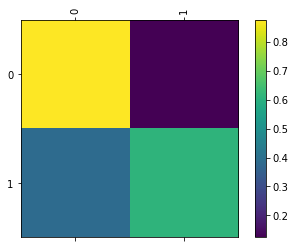

In [192]:
confusion = torch.zeros(2, 2)
n_confusion = len(test_set)

def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

true_i = []
pred_i = []

for i in range(n_confusion):
    category, line, category_tensor, line_tensor = TestingSample(test_set, i) 
    output = evaluate(line_tensor)
    guess = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess] += 1
    
    true_i.append(category)
    pred_i.append(guess)
    
for i in range(2):
    confusion[i] = confusion[i] / confusion[i].sum()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [196]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(true_i, pred_i, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.88      0.85       281
     class 1       0.69      0.61      0.65       129

    accuracy                           0.79       410
   macro avg       0.76      0.74      0.75       410
weighted avg       0.79      0.79      0.79       410



## 3. Hyperparameters tuning ##

In [197]:
def train_with_params (hidden_size, n_layers, lr):

    n_iters = 40000
    print_every = 50
    plot_every = 100
    
    decoder = GRU(n_letters, hidden_size, n_classes, n_layers=n_layers)
    decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=0.001) 
    criterion = nn.CrossEntropyLoss() 

    start = time.time()
    all_losses = []
    loss_avg = 0
    current_loss = 0
    
    for iteration in range(1, n_iters + 1):
        category, line, category_tensor, line_tensor = randomTrainingExample(train_set)
        output, loss = train(decoder, category_tensor, line_tensor, decoder_optimizer)
        loss_avg += loss

        if iteration % print_every == 0:
            guess = categoryFromOutput(output)
            correct = '✓' if guess == category else '✗ (%s)' % category
            print('%d %d%% (%s) %.4f %s / %s %s' % (iteration, iteration / n_iters * 100, timeSince(start), loss, line, guess, correct))

        if iteration % plot_every == 0:
            all_losses.append(loss_avg/ plot_every)
            loss_avg = 0
        
    
    return decoder, all_losses

### Learning rate ###

In [198]:
lr_var = [0.001, 0.003, 0.005]
logs_lr = []

for lr in lr_var:
    print ('Learning model with hidden size {}, number of layers {}, learning rate {}'.format(32, 1, lr))
    
    trained_model, loss = train_with_params (hidden_size=32, n_layers=1, lr=lr) 
    print ('Minimal loss ', min(loss))
    
    logs_lr.append('Hyperparameters: hidden size {}, number of layers {}, learning rate {}. \n Evaluations: min loss {}'.format(32, 1, lr, min(loss)))

logs_lr.append('\n')

Learning model with hidden size 32, number of layers 1, learning rate 0.001
50 0% (0m 0s) 0.7752 ['s', 'e', 'r', 'i', 'g', 'a', 'l', 'a'] / 0 ✗ (1)
100 0% (0m 0s) 0.2734 ['s', 'e', 'm', 'b', 'a', 'h', 'j', 'a', 'ŋ'] / 0 ✓
150 0% (0m 0s) 1.0113 ['b', 'o', 't', 'o', 'l'] / 0 ✗ (1)
200 0% (0m 1s) 0.5146 ['m', 'a', 's', 'u', 'ʔ'] / 0 ✓
250 0% (0m 1s) 0.5435 ['k', 'o', 'n', 't', 'o', 'l'] / 0 ✓
300 0% (0m 1s) 0.3687 ['p', 'e', 'r', 'i', 'u', 'ʔ'] / 0 ✓
350 0% (0m 1s) 0.3074 ['r', 'e', 'n', 'd', 'a', 'h'] / 0 ✓
400 1% (0m 2s) 0.0911 ['k', 'e', 's', 'a', 'ŋ', 's', 'i', 'a', 'n'] / 0 ✓
450 1% (0m 2s) 0.4554 ['m', 'e', 'n', 'é/e', 't', 'é/e', 's'] / 0 ✓
500 1% (0m 2s) 0.5404 ['t', 'a', 'dʒ', 'a', 'm'] / 0 ✓
550 1% (0m 2s) 2.6456 ['k', 'e', 'r', 'u', 'd', 'u', 'ŋ'] / 0 ✗ (1)
600 1% (0m 2s) 0.2037 ['k', 'i', 'k', 'i', 'r'] / 0 ✓
650 1% (0m 3s) 0.2243 ['dʒ', 'a', 'm', 'b', 'a', 'n'] / 0 ✓
700 1% (0m 3s) 0.4376 ['p', 'a', 's', 't', 'o', 'r'] / 1 ✓
750 1% (0m 3s) 0.2110 ['d', 'a', 'n'] / 0 ✓
800 2% 

In [199]:
logs_lr

['Hyperparameters: hidden size 32, number of layers 1, learning rate 0.001. \n Evaluations: min loss 0.005355071457379097',
 'Hyperparameters: hidden size 32, number of layers 1, learning rate 0.003. \n Evaluations: min loss 0.007853712702564693',
 'Hyperparameters: hidden size 32, number of layers 1, learning rate 0.005. \n Evaluations: min loss 0.005165107764977606',
 '\n']

### Hidden size ###

In [200]:
hidden_size_var = [16, 32, 64]
logs = []

for hidden_size in hidden_size_var:
    print ('Learning model with hidden size {}, number of layers {}, learning rate {}'.format(hidden_size, 1, 0.005))
    
    trained_model, loss = train_with_params (hidden_size, n_layers=1, lr=0.005) 
    print ('Minimal loss ', min(loss))
    
    logs.append('Hyperparameters: hidden size {}, number of layers {}, learning rate {}. \n Evaluations: min loss {}'.format(hidden_size, 1, 0.005, min(loss)))

logs.append('\n')

Learning model with hidden size 16, number of layers 1, learning rate 0.005
50 0% (0m 0s) 0.2846 ['g', 'e', 'r', 'g', 'a', 'dʒ', 'i'] / 0 ✓
100 0% (0m 0s) 1.6450 ['g', 'i', 'w', 'a', 'ŋ'] / 0 ✗ (1)
150 0% (0m 0s) 0.4292 ['p', 'u', 's', 'a', 'r', 'a', 'n', '+', 'a', 'i', 'r'] / 0 ✓
200 0% (0m 1s) 0.2523 ['k', 'i', 'dʒ', 'a', 'ŋ'] / 0 ✓
250 0% (0m 1s) 0.7706 ['s', 'e', 'k', 'r', 'u', 'p'] / 0 ✗ (1)
300 0% (0m 1s) 0.9228 ['s', 'i', 'h', 'i', 'r'] / 0 ✗ (1)
350 0% (0m 1s) 0.2388 ['m', 'e', 'l', 'a', 'k', 'u', 'k', 'a', 'n'] / 0 ✓
400 1% (0m 2s) 0.8316 ['l', 'é/e', 'h', 'é/e', 'r'] / 1 ✗ (0)
450 1% (0m 2s) 1.2623 ['g', 'u', 'l', 'a'] / 0 ✗ (1)
500 1% (0m 2s) 0.2616 ['m', 'e', 'ɲ', 'a', 'ŋ', 'g', 'a', 'h'] / 0 ✓
550 1% (0m 2s) 0.1965 ['k', 'u', 'ʔ'] / 0 ✓
600 1% (0m 3s) 0.2514 ['t', 'a', 'g', 'i', 'h', 'a', 'n'] / 0 ✓
650 1% (0m 3s) 1.0596 ['l', 'a', 'g', 'u', 'n', 'a'] / 0 ✗ (1)
700 1% (0m 3s) 0.4227 ['m', 'a', 'dʒ', 'a', 'l'] / 0 ✓
750 1% (0m 3s) 0.2237 ['k', 'e', 'dʒ', 'a', 'j', 'aː', 'n'

In [201]:
logs

['Hyperparameters: hidden size 16, number of layers 1, learning rate 0.005. \n Evaluations: min loss 0.08225491031937508',
 'Hyperparameters: hidden size 32, number of layers 1, learning rate 0.005. \n Evaluations: min loss 0.004987472401382362',
 'Hyperparameters: hidden size 64, number of layers 1, learning rate 0.005. \n Evaluations: min loss 0.0008457583479862762',
 '\n']

### Number of layers ###

In [202]:
n_layers = [1, 2]
lay_logs = []

for lay in n_layers:
    print ('Learning model with hidden size {}, number of layers {}, learning rate {}'.format(32, lay, 0.005))
    
    trained_model, loss = train_with_params (hidden_size=32, n_layers=lay, lr=0.005) 
    print ('Minimal loss ', min(loss))
    
    lay_logs.append('Hyperparameters: hidden size {}, number of layers {}, learning rate {}. \n Evaluations: min loss {}'.format(32, lay, 0.005, min(loss)))

lay_logs.append('\n')

Learning model with hidden size 32, number of layers 1, learning rate 0.005
50 0% (0m 0s) 0.3841 ['b', 'u', 'a', 'j', 'a'] / 0 ✓
100 0% (0m 0s) 0.3467 ['m', 'a', 'ŋ', 'k', 'u', 'ʔ'] / 0 ✓
150 0% (0m 0s) 0.2681 ['t', 'u', 'dʒ', 'u', 'h'] / 0 ✓
200 0% (0m 1s) 0.4237 ['k', 'i', 'l', 'a', 't'] / 0 ✓
250 0% (0m 1s) 1.3634 ['s', 'a', 'b', 'a', 'n', 'a'] / 0 ✗ (1)
300 0% (0m 1s) 0.3902 ['s', 'i', 'a', 'l'] / 0 ✓
350 0% (0m 1s) 1.6534 ['k', 'é/e', 'p', 'a', 'ŋ'] / 0 ✗ (1)
400 1% (0m 1s) 0.0707 ['h', 'u', 'k', 'u', 'm', 'a', 'n'] / 0 ✓
450 1% (0m 2s) 0.1214 ['u', 's', 'u', 's'] / 0 ✓
500 1% (0m 2s) 1.2727 ['t', 'e', 'l', 'a', 't'] / 0 ✗ (1)
550 1% (0m 2s) 0.1261 ['h', 'a', 'l', 'a', 'm', 'a', 'n'] / 0 ✓
600 1% (0m 2s) 0.7976 ['b', 'i', 'b', 'i'] / 1 ✗ (0)
650 1% (0m 2s) 0.3988 ['k', 'é/e', 'o', 'ŋ'] / 1 ✓
700 1% (0m 3s) 0.3413 ['d', 'i', '+', 'd', 'a', 'l', 'a', 'm'] / 0 ✓
750 1% (0m 3s) 0.1180 ['l', 'a', 'd', 'a', 'ŋ'] / 0 ✓
800 2% (0m 3s) 0.0707 ['l', 'a', 'u', 't', 'a', 'n'] / 0 ✓
850 2% (0m

In [203]:
lay_logs

['Hyperparameters: hidden size 32, number of layers 1, learning rate 0.005. \n Evaluations: min loss 0.004822384527724424',
 'Hyperparameters: hidden size 32, number of layers 2, learning rate 0.005. \n Evaluations: min loss 0.01781546574168715',
 '\n']

### Best model ###

The tuning procedure has shown, according to the least losses values, that the best hyperparameters configuration is the following: 

**Hidden size** = 32

**Number of layers** = 1

**Learning rate** = 0.005

In [204]:
best_model = train_with_params(32, 1, 0.005)

50 0% (0m 0s) 0.4508 ['b', 'a', 's', 'a', 'h'] / 0 ✓
100 0% (0m 0s) 0.3458 ['p', 'e', 'r', 't', 'e', 'm', 'p', 'u', 'r', 'a', 'n'] / 0 ✓
150 0% (0m 0s) 0.4609 ['k', 'e', '+', 'b', 'a', 'w', 'a', 'h'] / 0 ✓
200 0% (0m 1s) 0.3457 ['a', 'l', 'a', 's', '+', 'tʃ', 'a', 'ŋ', 'k', 'i', 'r'] / 0 ✓
250 0% (0m 1s) 0.9636 ['m', 'e', 'ɲ', 'u', 'p', 'i', 'r'] / 0 ✗ (1)
300 0% (0m 1s) 0.2527 ['dʒ', 'e', 'm', 'b', 'a', 't', 'a', 'n'] / 0 ✓
350 0% (0m 1s) 0.5804 ['m', 'e', 'n', 'e', 'm', 'p', 'a'] / 0 ✓
400 1% (0m 2s) 0.2963 ['dʒ', 'a', 'r', 'u', 'm'] / 0 ✓
450 1% (0m 2s) 0.3264 ['t', 'a', 'ŋ', 'g', 'a'] / 0 ✓
500 1% (0m 2s) 0.3959 ['h', 'a', 'n', 't', 'u'] / 0 ✓
550 1% (0m 2s) 0.0993 ['k', 'e', 's', 'a', 'l', 'a', 'h', 'a', 'n'] / 0 ✓
600 1% (0m 3s) 0.4966 ['a', 'p', 'a'] / 0 ✓
650 1% (0m 3s) 0.2900 ['i', 'b', 'u'] / 0 ✓
700 1% (0m 3s) 1.1693 ['p', 'r', 'a', 'dʒ', 'u', 'r', 'i', 't'] / 0 ✗ (1)
750 1% (0m 3s) 0.4641 ['t', 'u', 'b', 'a'] / 0 ✓
800 2% (0m 3s) 0.3670 ['m', 'e', 'ŋ', 'g', 'i', 'g', 'i', '

In [205]:
best_model = best_model[0]

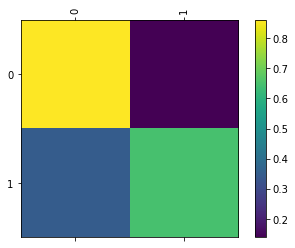

In [206]:
confusion = torch.zeros(2, 2)
n_confusion = len(test_set)

def evaluate(line_tensor):
    hidden = best_model.initHidden() 

    for i in range(line_tensor.size()[0]):
        output, hidden = best_model(line_tensor[i], hidden)

    return output

true_i = []
pred_i = []

for i in range(n_confusion):
    category, line, category_tensor, line_tensor = TestingSample(test_set, i)  
    output = evaluate(line_tensor)
    guess = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess] += 1
    
    true_i.append(category)
    pred_i.append(guess)

for i in range(2):
    confusion[i] = confusion[i] / confusion[i].sum()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [207]:
target_names = ['class 0', 'class 1']
print(classification_report(true_i, pred_i, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.86      0.85       281
     class 1       0.68      0.65      0.67       129

    accuracy                           0.80       410
   macro avg       0.76      0.76      0.76       410
weighted avg       0.79      0.80      0.79       410



This model can be run from `nn.py` file. 

Overall accuracy of 0.8 and F1-score of 0.67 for loanwords class can be considered as a relatively high performance. At least, it shows that the problem set in this project can be 'understood' by the machine; the patterns of automated loanword detection were formed and the task possess research potential in the future. 

## 4. Exemplar predictions ###

This part of the notebook provides two functions for extracting various examples of the loanwords from different blocks of confusion matrix. 

This is important to empirically examine the model's performance and analyse the prediction pattern based on the words' properties. 

In [208]:
def get_words_info(model):
    
    words_info = {(0, 0): [], (0, 1): [], (1, 0): [], (1, 1): []} #first n - category, second n - guess
    
    for i in range(n_confusion):
        category, line, category_tensor, line_tensor = TestingSample(test_set, i)
        output = evaluate(line_tensor)
        guess = categoryFromOutput(output)
        words_info[(category, guess)] += [(test_set.value[i], float(output[0][guess]))] #(word, sureness)
    return words_info
        
test_words_info = get_words_info(best_model)

In [209]:
def get_most_easy_words(words_info):
    
    sorted_true_loanwords = sorted(words_info[(1, 1)], key=lambda tup: tup[1], reverse=True)
    sorted_false_loanwords = sorted(words_info[(0, 1)], key=lambda tup: tup[1], reverse=True)
    sorted_false_nonloanwords = sorted(words_info[(1, 0)], key=lambda tup: tup[1], reverse=True)
    print("Loanwords model the most sure about:")
    
    for word in sorted_true_loanwords[:10]:
        print(word[0])
    print("Words recognized as loanwords that are not true:")
    
    for word in sorted_false_loanwords[:10]:
        print(word[0])
    print("Words recognized as nonloanwords that are not true:")
    
    for word in sorted_false_nonloanwords[:10]:
        print(word[0])
        
get_most_easy_words(test_words_info)

Loanwords model the most sure about:
putra, putera
romo
flu
geréja
lépa
cakrawala
séla
paron
singkong
mentéga
Words recognized as loanwords that are not true:
lima
ia
racun
kongkalikong
obat
merobék
kuali
mak, emak
serta-merta
sana
Words recognized as nonloanwords that are not true:
talak
(kain) lap
lindung
menyangka
gelas
mengajar
rayap
bagal
jambut
dian


In [210]:
test_words_info

{(0, 0): [('pondok', 2.511669635772705),
  ('meramin', 5.838287830352783),
  ('mencurigai', 3.484938144683838),
  ('mengocok', 2.0622384548187256),
  ('ubi madu', 1.1105751991271973),
  ('pergi', 0.4779964089393616),
  ('keperluan', 5.330962657928467),
  ('tengah hari', 2.983846664428711),
  ('menjual', 1.0005309581756592),
  ('berjanji', 5.6058125495910645),
  ('dua puluh', 9.056723594665527),
  ('mengawétkan', 0.8081333637237549),
  ('benih', 3.725644111633301),
  ('menimba', 2.8776628971099854),
  ('cerdas', 0.9994760155677795),
  ('(buah) ara', 6.681344509124756),
  ('putusan', 5.523177146911621),
  ('tapak/telapak tangan', 7.631511688232422),
  ('kita', 0.429154634475708),
  ('tangan', 8.852116584777832),
  ('percékcokan', 5.6262311935424805),
  ('menyalakan', 6.788440704345703),
  ('menyapu', 7.179325103759766),
  ('makan siang', 6.436635494232178),
  ('tenang', 4.965640068054199),
  ('malam', 3.372413396835327),
  ('meraba', 3.3990907669067383),
  ('katak', 0.4130028486251831),


### Resources 

Haspelmath, Martin and Tadmor, Uri (eds.) 2009. World Loanword Database. Leipzig: Max Planck Institute for Evolutionary Anthropology. (Available online at http://wold.clld.org, Accessed on 2021-02-26.)

Miller J, Tresoldi T, Zariquiey R, Beltrán Castañón C, Morozova N, List J-M (2020) Using lexical language models to detect borrowings in monolingual wordlists. PLoS ONE 15(12): e0242709. https://doi.org/10.1371/journal.pone.0242709

Robertson, Sean. PyTorch Tutorial. NLP FROM SCRATCH: CLASSIFYING NAMES WITH A CHARACTER-LEVEL RNN. url: https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html#nlp-from-scratch-classifying-names-with-a-character-level-rnn